<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(2_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.4_n250.csv',
 'data_multi_delta_2.4_n120.csv',
 'data_multi_delta_2.4_n60.csv',
 'data_multi_delta_2.4_n30.csv',
 'data_multi_delta_2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,92.663551,80.832849,24.361493,96.644199,118.860527,423.362618,347.824737,75.537881
1,0.0,1.0,21.111572,89.093729,95.568251,50.007032,-264.649777,1.130807,202.926498,-201.795691
2,0.0,2.0,20.113321,20.389374,28.563748,44.980029,-0.297205,123.749266,104.786566,18.962700
3,0.0,3.0,54.983859,35.880897,78.132775,53.627280,179.079779,411.704591,229.087201,182.617390
4,0.0,4.0,27.453412,89.325381,80.951102,62.529083,-159.516801,110.742177,222.326151,-111.583974
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,72.321423,84.783647,53.077079,86.952303,-11.348311,295.786141,304.062294,-8.276153
249996,999.0,246.0,29.639762,80.152308,47.916227,62.041700,156.427597,386.177593,237.075363,149.102230
249997,999.0,247.0,66.731362,50.471567,36.189590,84.056999,17.356788,264.806306,235.429344,29.376962
249998,999.0,248.0,20.034740,98.357129,43.803139,94.025097,-517.735861,-251.515757,251.184124,-502.699881


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,92.663551,80.832849,24.361493,96.644199,118.860527,423.362618,347.824737,75.537881
1,0.0,1.0,21.111572,89.093729,95.568251,50.007032,-264.649777,1.130807,202.926498,-201.795691
2,0.0,2.0,20.113321,20.389374,28.563748,44.980029,-0.297205,123.749266,104.786566,18.962700
3,0.0,3.0,54.983859,35.880897,78.132775,53.627280,179.079779,411.704591,229.087201,182.617390
4,0.0,4.0,27.453412,89.325381,80.951102,62.529083,-159.516801,110.742177,222.326151,-111.583974
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,72.321423,84.783647,53.077079,86.952303,-11.348311,295.786141,304.062294,-8.276153
249996,999.0,246.0,29.639762,80.152308,47.916227,62.041700,156.427597,386.177593,237.075363,149.102230
249997,999.0,247.0,66.731362,50.471567,36.189590,84.056999,17.356788,264.806306,235.429344,29.376962
249998,999.0,248.0,20.034740,98.357129,43.803139,94.025097,-517.735861,-251.515757,251.184124,-502.699881


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    92.663551  80.832849  24.361493  96.644199  118.860527   
      1.0    21.111572  89.093729  95.568251  50.007032 -264.649777   
      2.0    20.113321  20.389374  28.563748  44.980029   -0.297205   
      3.0    54.983859  35.880897  78.132775  53.627280  179.079779   
      4.0    27.453412  89.325381  80.951102  62.529083 -159.516801   
...                ...        ...        ...        ...         ...   
999.0 245.0  72.321423  84.783647  53.077079  86.952303  -11.348311   
      246.0  29.639762  80.152308  47.916227  62.041700  156.427597   
      247.0  66.731362  50.471567  36.189590  84.056999   17.356788   
      248.0  20.034740  98.357129  43.803139  94.025097 -517.735861   
      249.0  71.504713  22.407163  76.700336  88.888092   -5.032686   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    423.362618  347.824737   75.537881  
      1.0      1.130807  202.926498 -201.795691  
      2.0    123.749266  104.786566   18.962700  
      3.0    411.704591  229.087201  182.617390  
      4.0    110.742177  222.326151 -111.583974  
...                 ...         ...         ...  
999.0 245.0  295.786141  304.062294   -8.276153  
      246.0  386.177593  237.075363  149.102230  
      247.0  264.806306  235.429344   29.376962  
      248.0 -251.515757  251.184124 -502.699881  
      249.0  264.467618  239.097383   25.370235  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    92.663551  80.832849  24.361493  96.644199  118.860527   
      1.0    21.111572  89.093729  95.568251  50.007032 -264.649777   
      2.0    20.113321  20.389374  28.563748  44.980029   -0.297205   
      3.0    54.983859  35.880897  78.132775  53.627280  179.079779   
      4.0    27.453412  89.325381  80.951102  62.529083 -159.516801   
...                ...        ...        ...        ...         ...   
999.0 245.0  72.321423  84.783647  53.077079  86.952303  -11.348311   
      246.0  29.639762  80.152308  47.916227  62.041700  156.427597   
      247.0  66.731362  50.471567  36.189590  84.056999   17.356788   
      248.0  20.034740  98.357129  43.803139  94.025097 -517.735861   
      249.0  71.504713  22.407163  76.700336  88.888092   -5.032686   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    423.362618  347.824737   75.537881  
      1.0      1.130807  202.926498 -201.795691  
      2.0    123.749266  104.786566   18.962700  
      3.0    411.704591  229.087201  182.617390  
      4.0    110.742177  222.326151 -111.583974  
...                 ...         ...         ...  
999.0 245.0  295.786141  304.062294   -8.276153  
      246.0  386.177593  237.075363  149.102230  
      247.0  264.806306  235.429344   29.376962  
      248.0 -251.515757  251.184124 -502.699881  
      249.0  264.467618  239.097383   25.370235  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,92.663551,80.832849,24.361493,96.644199,118.860527,423.362618,347.824737,75.537881
1,0.0,1.0,21.111572,89.093729,95.568251,50.007032,-264.649777,1.130807,202.926498,-201.795691
2,0.0,2.0,20.113321,20.389374,28.563748,44.980029,-0.297205,123.749266,104.786566,18.962700
3,0.0,3.0,54.983859,35.880897,78.132775,53.627280,179.079779,411.704591,229.087201,182.617390
4,0.0,4.0,27.453412,89.325381,80.951102,62.529083,-159.516801,110.742177,222.326151,-111.583974
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,72.321423,84.783647,53.077079,86.952303,-11.348311,295.786141,304.062294,-8.276153
249996,999.0,246.0,29.639762,80.152308,47.916227,62.041700,156.427597,386.177593,237.075363,149.102230
249997,999.0,247.0,66.731362,50.471567,36.189590,84.056999,17.356788,264.806306,235.429344,29.376962
249998,999.0,248.0,20.034740,98.357129,43.803139,94.025097,-517.735861,-251.515757,251.184124,-502.699881


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    92.663551  80.832849  24.361493  96.644199  118.860527   
      1.0    21.111572  89.093729  95.568251  50.007032 -264.649777   
      2.0    20.113321  20.389374  28.563748  44.980029   -0.297205   
      3.0    54.983859  35.880897  78.132775  53.627280  179.079779   
      4.0    27.453412  89.325381  80.951102  62.529083 -159.516801   
...                ...        ...        ...        ...         ...   
999.0 245.0  72.321423  84.783647  53.077079  86.952303  -11.348311   
      246.0  29.639762  80.152308  47.916227  62.041700  156.427597   
      247.0  66.731362  50.471567  36.189590  84.056999   17.356788   
      248.0  20.034740  98.357129  43.803139  94.025097 -517.735861   
      249.0  71.504713  22.407163  76.700336  88.888092   -5.032686   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0    423.362618  347.824737   75.537881  
      1.0      1.130807  202.926498 -201.795691  
      2.0    123.749266  104.786566   18.962700  
      3.0    411.704591  229.087201  182.617390  
      4.0    110.742177  222.326151 -111.583974  
...                 ...         ...         ...  
999.0 245.0  295.786141  304.062294   -8.276153  
      246.0  386.177593  237.075363  149.102230  
      247.0  264.806306  235.429344   29.376962  
      248.0 -251.515757  251.184124 -502.699881  
      249.0  264.467618  239.097383   25.370235  

[250000 rows x 8 columns]

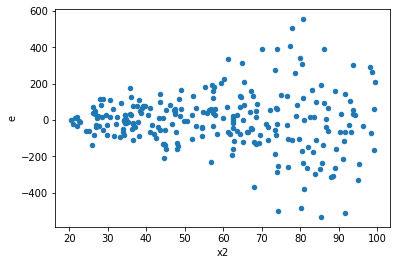

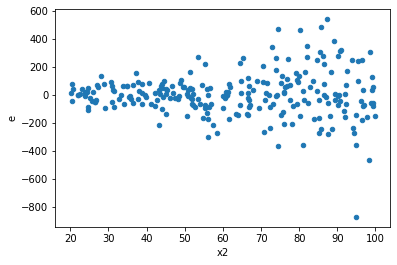

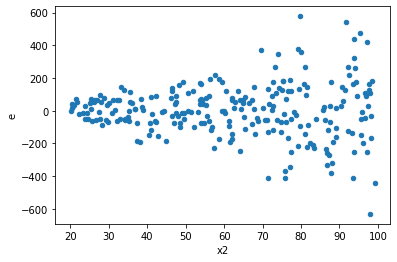

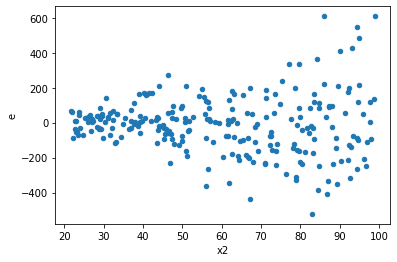

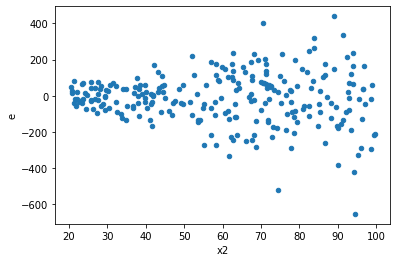

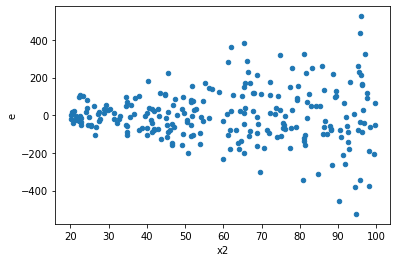

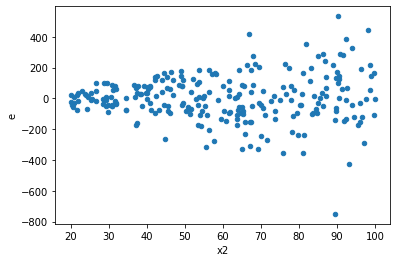

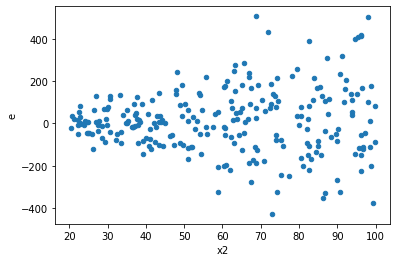

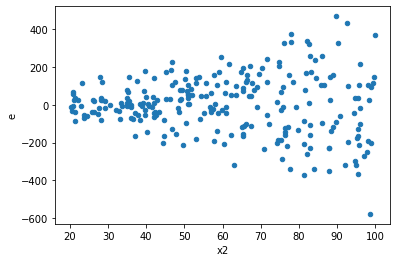

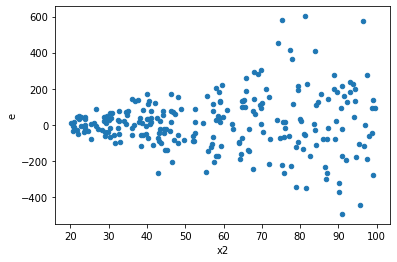

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,98.0,98.0,819742.2661100012,4257841.048248031,8364.717001122463,43447.357635183995,5.1941216456401085,1.0436096431476471e-14,0.9999999999999948,5.218048215738236e-15,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,1345890.3688097943,3854636.711863439,13733.575191936676,39333.02767207591,2.8640049748421887,3.727834756439563e-07,0.9999998136082622,1.8639173782197815e-07,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,1790538.8386970148,3749192.701938151,18270.80447650015,38257.06838712399,2.093890744456825,0.0003079974216977366,0.9998460012891511,0.0001539987108488683,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,1387767.0277540635,2685539.463890455,14160.88803830677,27403.463917249544,1.9351515133175363,0.0012352673010174176,0.9993823663494913,0.0006176336505087088,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,1235022.0857752343,2887362.1342430203,12602.266181379942,29462.878920847146,2.3379032387348744,3.588789396347103e-05,0.9999820560530183,1.7943946981735515e-05,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,1101649.29039873,3139349.2232963922,11241.31928978296,32034.17574792237,2.8496811559331543,4.2114554554828487e-07,0.9999997894272272,2.1057277277414244e-07,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,1648718.112602028,3118327.569913517,16823.654210224777,31819.669080750176,1.8913649010576663,0.0018056516053324145,0.9990971741973338,0.0009028258026662073,Reject001=0 : Heteroscedasticity
9.0,98.0,98.0,1865311.607870969,3042528.9813520797,19033.791917050705,31046.214095429383,1.6311103027042027,0.016230444920465992,0.991884777539767,0.008115222460232996,Reject001=1 : Homoscedasticity
10.0,98.0,98.0,1342171.223269517,1792935.8303018103,13695.62472723997,18295.26357450827,1.3358473190434188,0.15353762179650188,0.9232311891017491,0.07676881089825094,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,2603149.6436326066,2210435.1157473475,26562.75146563884,22555.460364768853,0.8491387043976315,0.4197036568104305,Reject001=1 : Homoscedasticity
1.0,98.0,98.0,819742.2661100012,4257841.048248031,8364.717001122463,43447.357635183995,5.1941216456401085,1.0436096431476471e-14,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,1345890.3688097943,3854636.711863439,13733.575191936676,39333.02767207591,2.8640049748421887,3.727834756439563e-07,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,1790538.8386970148,3749192.701938151,18270.80447650015,38257.06838712399,2.093890744456825,0.0003079974216977366,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,1902200.523808514,1854778.7528825628,19410.20942661749,18926.31380492411,0.9750700463319161,0.9008076497330344,Reject001=1 : Homoscedasticity
5.0,98.0,98.0,1387767.0277540635,2685539.463890455,14160.88803830677,27403.463917249544,1.9351515133175363,0.0012352673010174176,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,1235022.0857752343,2887362.1342430203,12602.266181379942,29462.878920847146,2.3379032387348744,3.588789396347103e-05,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,1101649.29039873,3139349.2232963922,11241.31928978296,32034.17574792237,2.8496811559331543,4.2114554554828487e-07,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,1648718.112602028,3118327.569913517,16823.654210224777,31819.669080750176,1.8913649010576663,0.0018056516053324145,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    684
Reject001=1 : Homoscedasticity      316
Name: Result_test, dtype: int64